In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("studentTandF16.xlsx", sheet_name="NewSheet",converters={'zips':str})
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df2 = pd.read_excel("studentTandF17.xlsx", sheet_name="NewSheet",converters={'zips':str})
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)
df2.drop(['totalDistance '], axis = 1, inplace = True)
df3 = pd.read_excel("cf.xlsx", sheet_name="1819Students",converters={'HOME ZIP':str})

In [3]:
df.head(2)

,distance,zips
0,1573,00902
1,1573,00921


In [4]:
df2.head(2)

,zips,distance
0,00824,Virgin Islands
1,00902,1573


In [5]:
df3.columns = ['HOMEZIP']
df3.head(2)

,HOMEZIP
0,00902
1,00921


In [6]:
df3.columns

Index(['HOMEZIP'], dtype='object')

In [7]:
df3.HOMEZIP = df3.HOMEZIP.astype(str)
df3['zips'] = df3['HOMEZIP'].str.split('-').str.get(0)
df3.drop(['HOMEZIP'], axis = 1, inplace = True)

In [8]:
df3.sort_values(by=['zips'], inplace = True)
df3.head()

,zips
1106,00824
0,00902
1,00921
2,00966
3,00987


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
distance    1309 non-null object
zips        1309 non-null object
dtypes: object(2)
memory usage: 20.5+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
zips        731 non-null object
distance    731 non-null object
dtypes: object(2)
memory usage: 11.5+ KB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 1106 to 1103
Data columns (total 1 columns):
zips    1288 non-null object
dtypes: object(1)
memory usage: 20.1+ KB


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df3['zips'].value_counts())

21620     30
19709     20
21146     15
21601     12
21617     11
21409      9
20910      9
21093      9
21042      9
21014      8
21784      8
19064      8
21901      8
21678      8
21661      7
21015      7
21136      7
21122      7
21701      7
19702      7
21666      7
19348      6
21204      6
19958      6
21401      6
19734      6
21212      5
21131      5
21037      5
18901      5
20902      5
19063      5
21050      5
08057      5
21921      5
19901      5
21111      5
21236      5
19803      5
19380      5
21804      5
21286      5
21651      5
19720      5
19701      5
21771      5
19956      4
21117      4
21210      4
19810      4
17601      4
19083      4
21152      4
20904      4
21114      4
21635      4
21061      4
19963      4
21228      4
20906      4
19808      4
21403      4
19707      4
21030      4
21904      3
21703      3
21919      3
21811      3
21911      3
08062      3
20866      3
19355      3
21043      3
21673      3
21161      3
21090      3
21048      3

In [13]:
df.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True) 
df2.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True)  
df3.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True) 

In [14]:
firstJoin = df2.merge(df, on = "zips", how = "outer")
firstJoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 3 columns):
zips          888 non-null object
distance_x    731 non-null object
distance_y    712 non-null object
dtypes: object(3)
memory usage: 27.8+ KB


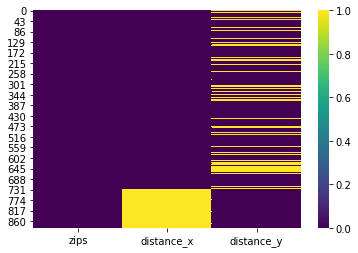

In [15]:
sns.heatmap(firstJoin.isnull(), cmap = 'viridis')

In [16]:
firstJoin.head(5)

,zips,distance_x,distance_y
0,00824,Virgin Islands,NaN
1,00902,1573,1573
2,00913,Puerto Rico,NaN
3,00921,1573,1573
4,00966,1573,1573


In [17]:
firstJoin.columns

Index(['zips', 'distance_x', 'distance_y'], dtype='object')

In [18]:
# where function where two columns are not nans 

In [19]:
firstJoin['distance']=firstJoin['distance_x'].fillna(firstJoin['distance_y'])
firstJoin.head()

,zips,distance_x,distance_y,distance
0,00824,Virgin Islands,NaN,Virgin Islands
1,00902,1573,1573,1573
2,00913,Puerto Rico,NaN,Puerto Rico
3,00921,1573,1573,1573
4,00966,1573,1573,1573


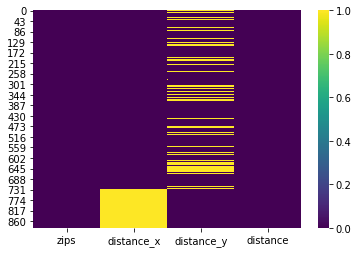

In [20]:
sns.heatmap(firstJoin.isnull(), cmap = 'viridis')

In [21]:
firstJoin.drop(['distance_x','distance_y'], axis = 1, inplace = True)

In [22]:
firstJoin.head()

,zips,distance
0,00824,Virgin Islands
1,00902,1573
2,00913,Puerto Rico
3,00921,1573
4,00966,1573


In [23]:
finalJoin = df3.merge(firstJoin, on = 'zips', how = 'left')

In [24]:
finalJoin.head()

,zips,distance
0,00824,Virgin Islands
1,00902,1573
2,00921,1573
3,00966,1573
4,00987,NaN


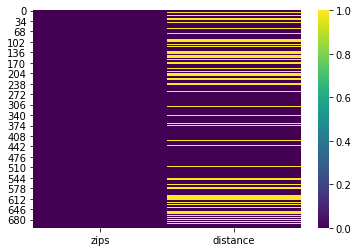

In [25]:
sns.heatmap(finalJoin.isnull(), cmap = 'viridis')

In [26]:
#finalJoin.to_excel('studentTandF18.xlsx', sheet_name = 'NewSheet') 